In [20]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator

In [21]:
# Memuat dan mempersiapkan dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [22]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
# Standarisasi fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=data.feature_names)
df_scaled['target'] = df['target']
# Menentukan fitur dan target
fitur = data.feature_names
target = 'target'

In [24]:
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


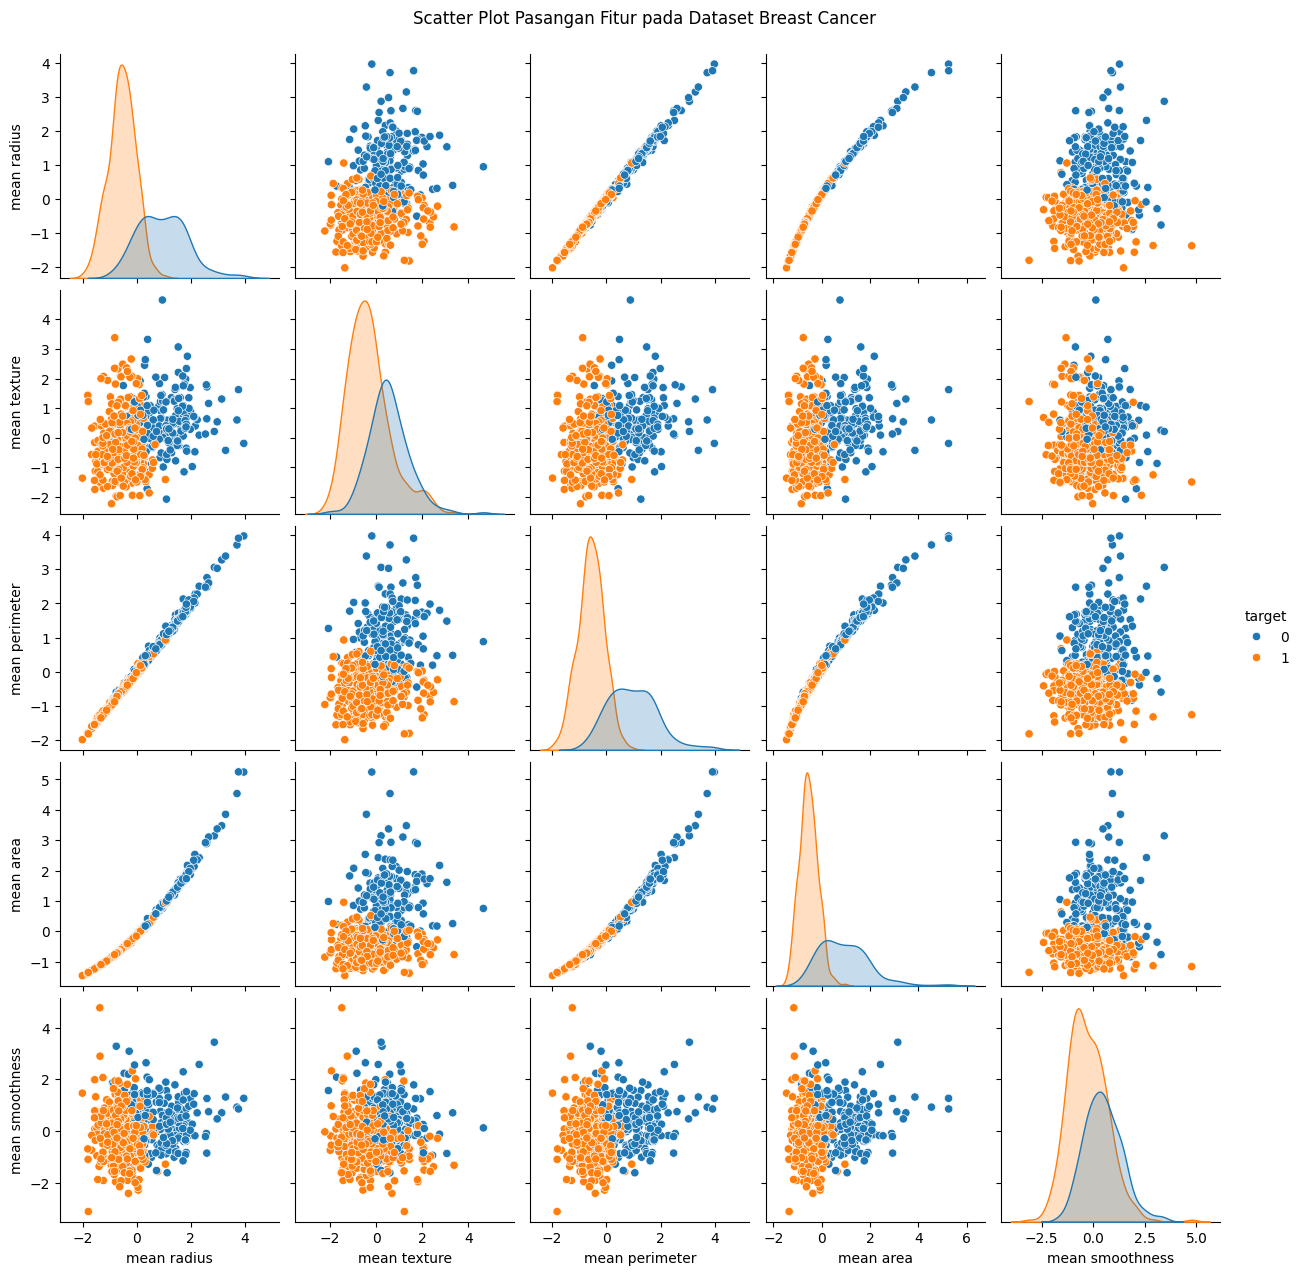

In [25]:
# Scatter Plots (pasangan feature)
# Menggunakan PairPlot untuk simplicitas
sns.pairplot(df_scaled, vars=fitur[:5], hue="target")  # Hanya 5 fitur pertama untuk simplicitas
plt.suptitle("Scatter Plot Pasangan Fitur pada Dataset Breast Cancer", y=1.02)
plt.show()

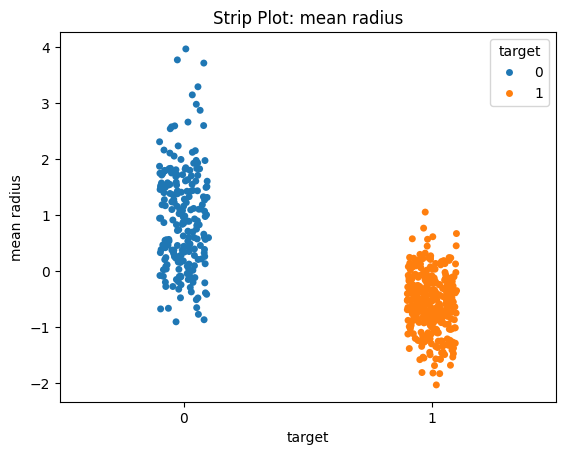

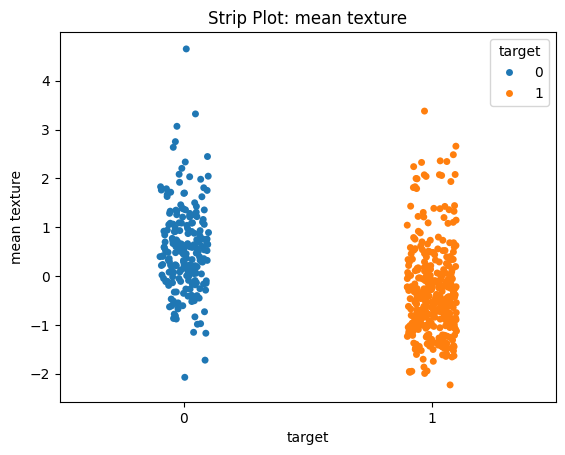

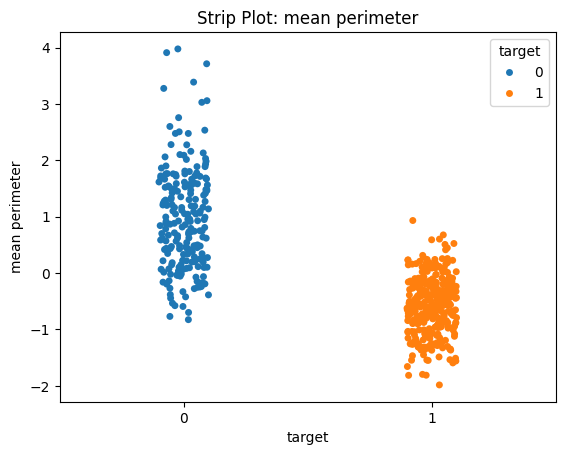

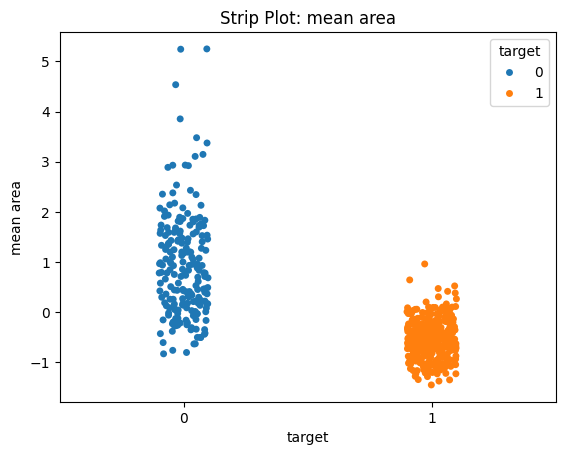

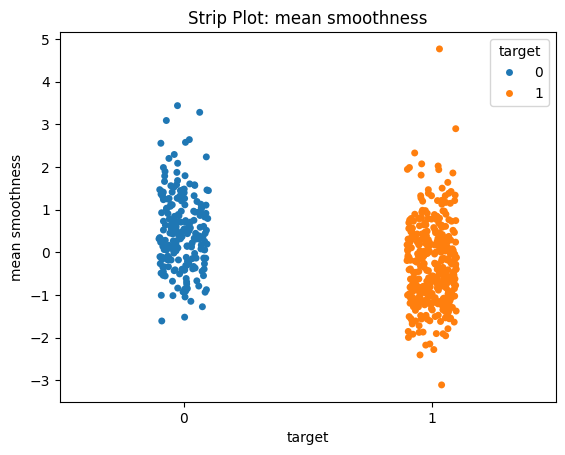

In [26]:
# StripPlot (masing-masing feature)
for feature in fitur[:5]:  # Hanya 5 fitur pertama untuk simplicitas
    sns.stripplot(x='target', y=feature, data=df_scaled,hue='target')
    plt.title(f"Strip Plot: {feature}")
    plt.show()

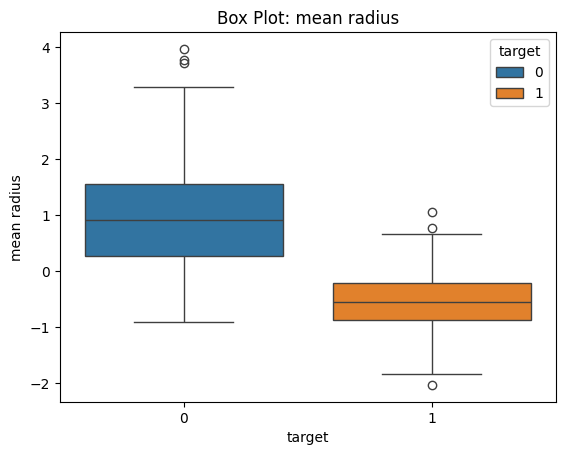

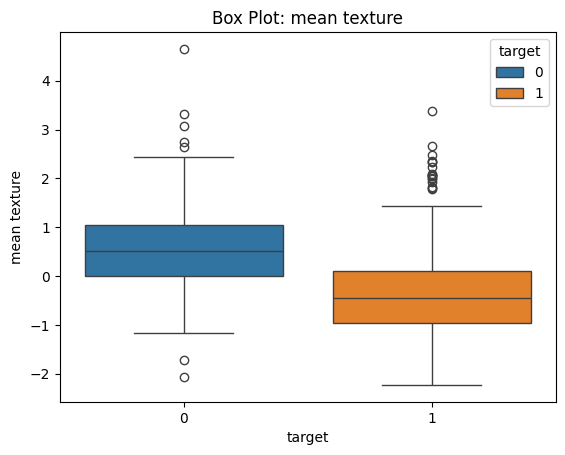

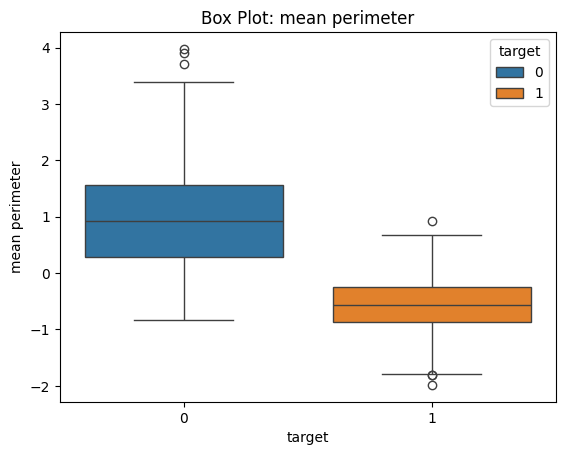

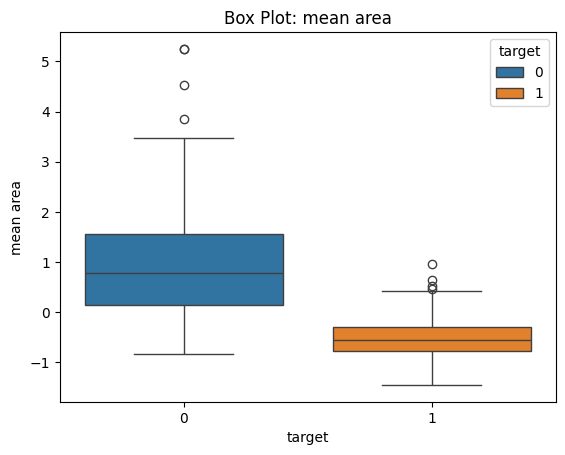

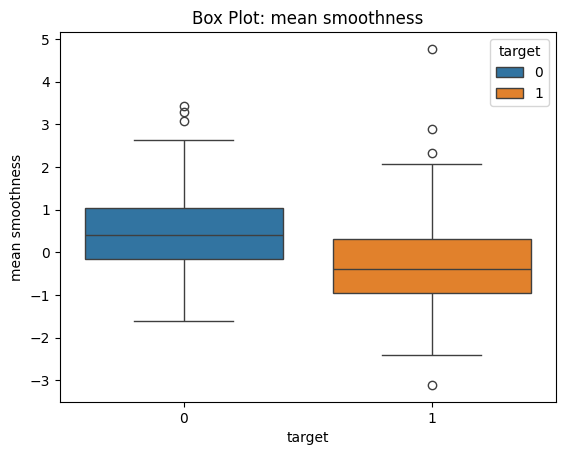

In [27]:
# BoxPlot (masing-masing feature)
for feature in fitur[:5]:  # Hanya 5 fitur pertama untuk simplicitas
    sns.boxplot(x='target', y=feature, data=df_scaled,hue='target')
    plt.title(f"Box Plot: {feature}")
    plt.show()

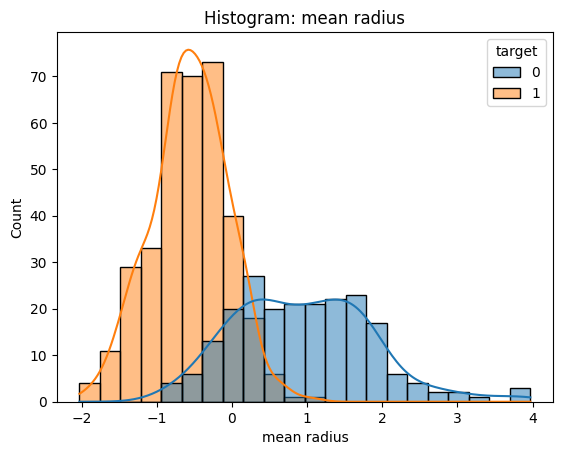

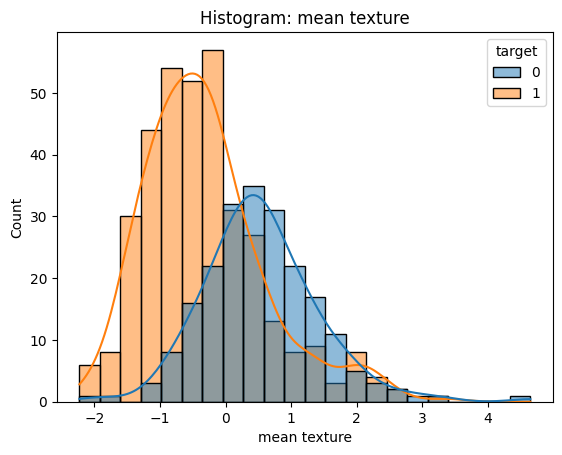

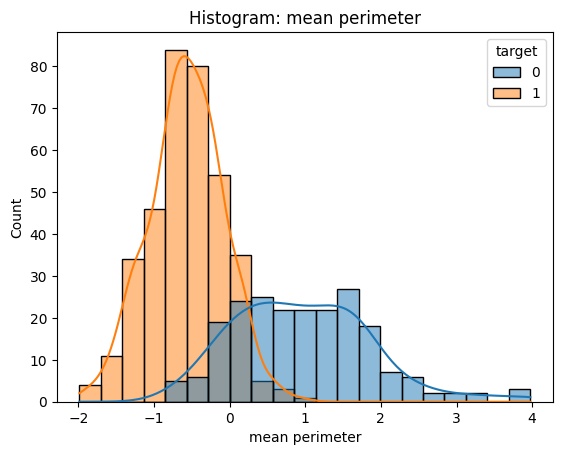

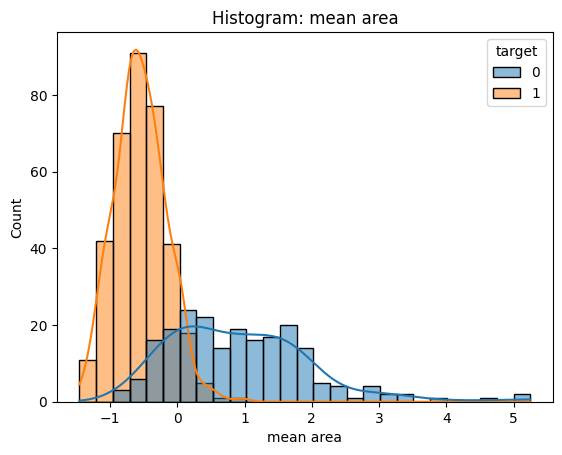

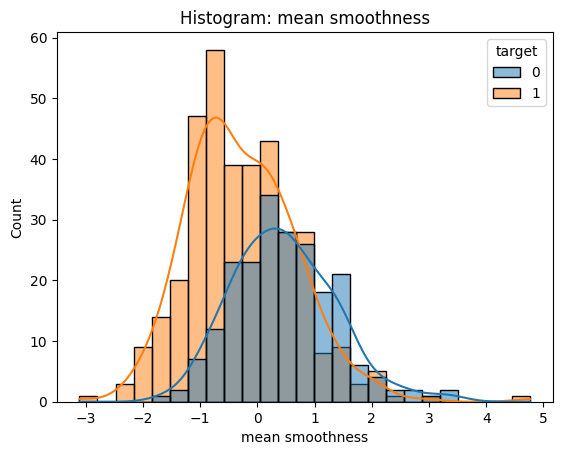

In [28]:
# Histogram (masing-masing feature)
for feature in fitur[:5]:  # Hanya 5 fitur pertama untuk simplicitas
    sns.histplot(data=df_scaled, x=feature, kde=True, hue="target")
    plt.title(f"Histogram: {feature}")
    plt.show()

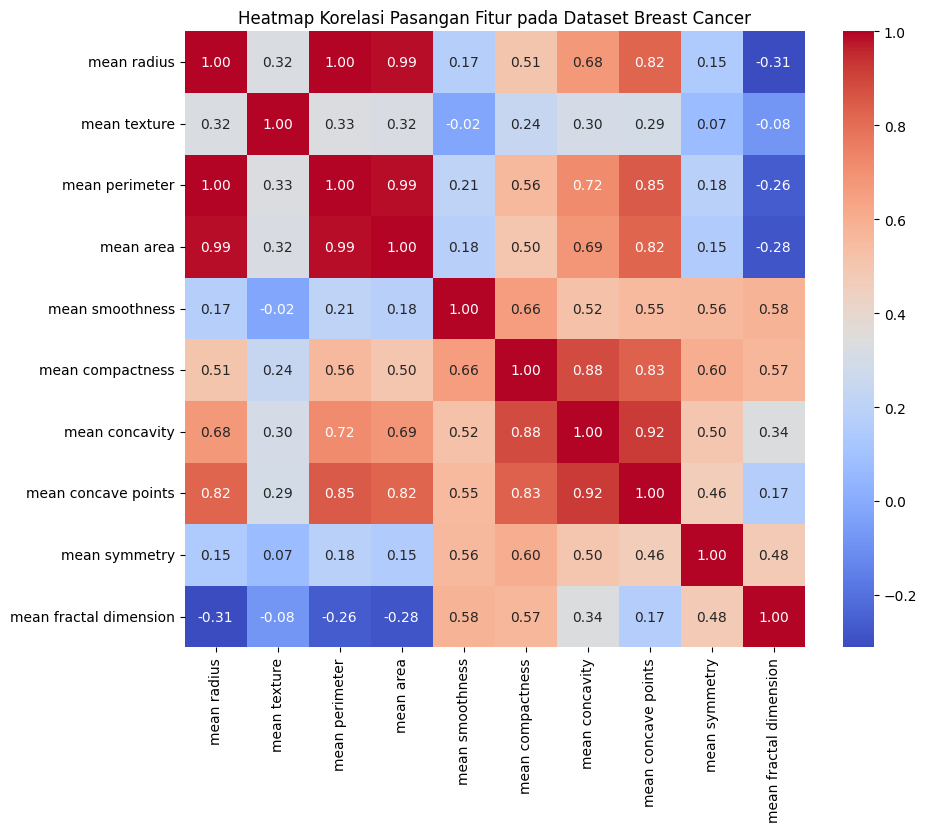

In [29]:
# Heatmap (pasangan feature)
plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled[fitur[:10]].corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Hanya 10 fitur pertama untuk simplicitas
plt.title("Heatmap Korelasi Pasangan Fitur pada Dataset Breast Cancer")
plt.show()

In [30]:
# Frekuensi masing-masing feature
for feature in fitur[:5]:  # Hanya 5 fitur pertama untuk simplicitas
    print(f"Frekuensi {feature}:")
    print(df_scaled[feature].value_counts())
    print("\n")

Frekuensi mean radius:
mean radius
-0.507616    4
-0.686545    3
-0.473535    3
-0.305966    3
-1.098366    3
            ..
-0.538858    1
 0.091654    1
 1.435041    1
 1.122625    1
-1.808401    1
Name: count, Length: 456, dtype: int64


Frekuensi mean texture:
mean texture
 0.286311    3
-0.567723    3
-0.570050    3
 0.125743    3
-1.014519    3
            ..
-0.165140    1
-0.972632    1
 0.726127    1
-1.016847    1
 1.221792    1
Name: count, Length: 479, dtype: int64


Frekuensi mean perimeter:
mean perimeter
-0.385500    3
-0.173371    3
 1.760097    3
 0.082420    2
-0.382205    2
            ..
 1.463528    1
-0.055155    1
-0.388796    1
 0.347273    1
-1.814389    1
Name: count, Length: 522, dtype: int64


Frekuensi mean area:
mean area
-0.405822    3
 1.194838    2
-0.205313    2
-0.725500    2
-0.038933    2
            ..
-0.419474    1
-0.127954    1
-0.543761    1
-0.642736    1
-1.347789    1
Name: count, Length: 539, dtype: int64


Frekuensi mean smoothness:
mean 

# K-Means



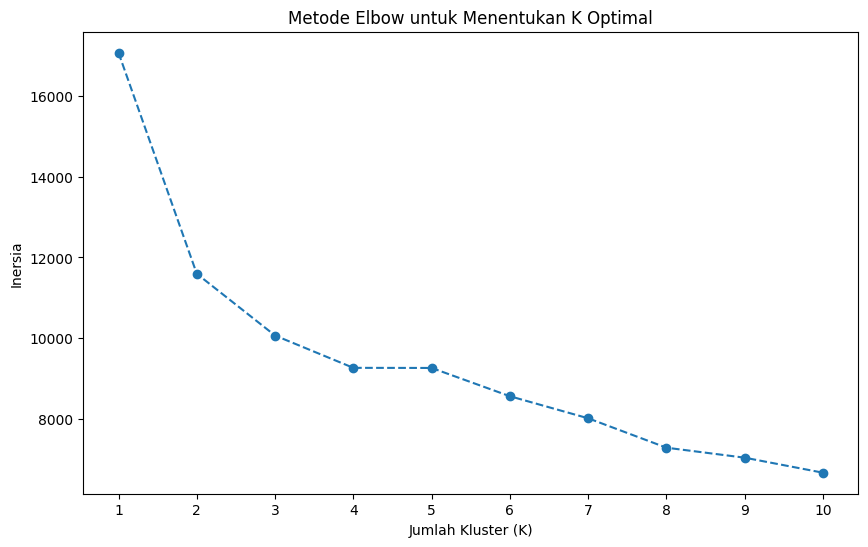

K optimal berdasarkan metode Elbow adalah: 3


In [31]:
# Menyiapkan array untuk inersia
inersia = []

# Menghitung inersia untuk berbagai nilai K
for i in range(1, 11):  # Mencoba K dari 1 sampai 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled.drop('target', axis=1))  # Menggunakan data yang telah distandarisasi
    inersia.append(kmeans.inertia_)

# Membuat plot Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inersia, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('Inersia')
plt.xticks(range(1, 11))
plt.show()

kn=KneeLocator(range(1,11),inersia,curve='convex',direction='decreasing')
print(f"K optimal berdasarkan metode Elbow adalah: {kn.elbow}")

In [32]:
# Fungsi Forward Selection untuk K-Means
def forward_selection_kmeans(df, n_clusters):
    best_features = []
    remaining_features = list(df.columns[:-1])  # Asumsi kolom terakhir adalah target
    best_score = -1

    while remaining_features:
        scores = []
        for feature in remaining_features:
            tested_features = best_features + [feature]
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            kmeans.fit(df[tested_features])
            score = silhouette_score(df[tested_features], kmeans.labels_)
            scores.append((score, feature))
        
        scores.sort(reverse=True)
        if scores[0][0] > best_score:
            best_score, best_feature = scores[0]
            best_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    return best_features, best_score

# Menentukan jumlah kluster dari analisis sebelumnya atau menggunakan metode seperti Elbow Method
n_clusters = 3

# Melakukan Forward Selection
selected_features, best_score = forward_selection_kmeans(df_scaled.drop('target', axis=1), n_clusters)

print(f"Fitur terbaik: {selected_features}")
print(f"Silhouette Score terbaik: {best_score}")

Fitur terbaik: ['area error']
Silhouette Score terbaik: 0.7630319043365973


In [33]:
# Fungsi Backward Elimination untuk K-Means
def backward_selection_kmeans(df, n_clusters):
    best_features = list(df.columns[:-1])  # Asumsi kolom terakhir adalah target
    best_score = -1

    while best_features:
        scores = []
        for feature in best_features:
            tested_features = list(best_features)
            tested_features.remove(feature)
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            kmeans.fit(df[tested_features])
            score = silhouette_score(df[tested_features], kmeans.labels_)
            scores.append((score, feature))
        
        scores.sort(reverse=True)
        if scores and scores[0][0] > best_score:
            best_score, worst_feature = scores[0]
            best_features.remove(worst_feature)
        else:
            break

    return best_features, best_score

# Menentukan jumlah kluster dari analisis sebelumnya atau menggunakan metode seperti Elbow Method
n_clusters = 3

# Melakukan Backward Elimination
selected_features, best_score = backward_selection_kmeans(df_scaled.drop('target', axis=1), n_clusters)

print(f"Fitur terbaik: {selected_features}")
print(f"Silhouette Score terbaik: {best_score}")

Fitur terbaik: ['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points', 'worst symmetry']
Silhouette Score terbaik: 0.39015730996662695


# Hierarchical Clustering



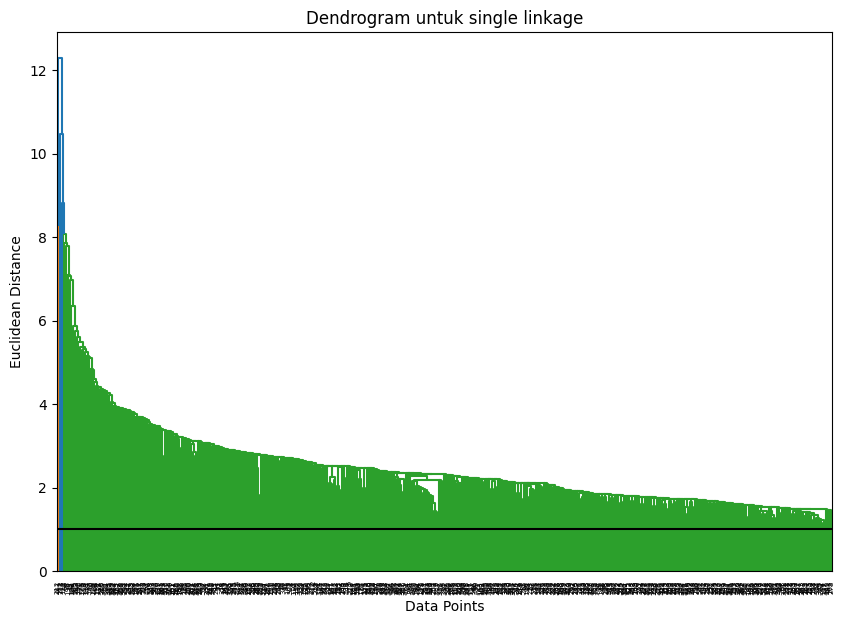

Nilai k optimal untuk metode Single linkage adalah: 2 dengan Silhouette Score: 0.6606668813897673


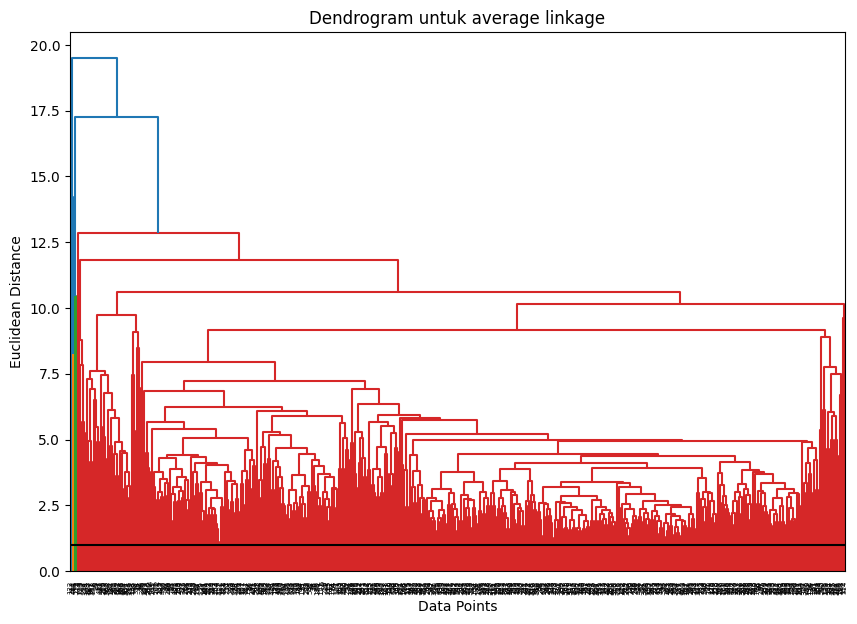

Nilai k optimal untuk metode Average linkage adalah: 2 dengan Silhouette Score: 0.6339782218419878


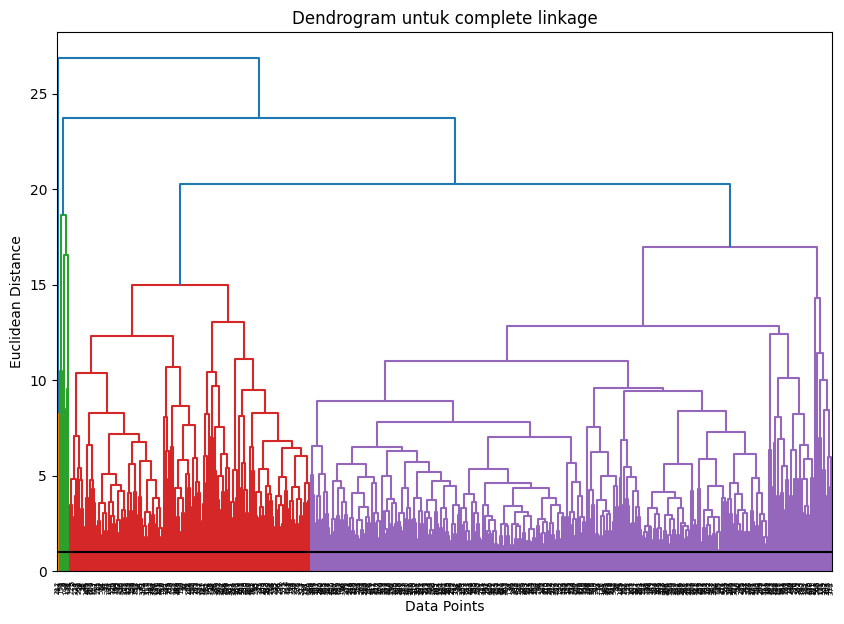

Nilai k optimal untuk metode Complete linkage adalah: 2 dengan Silhouette Score: 0.6606668813897673


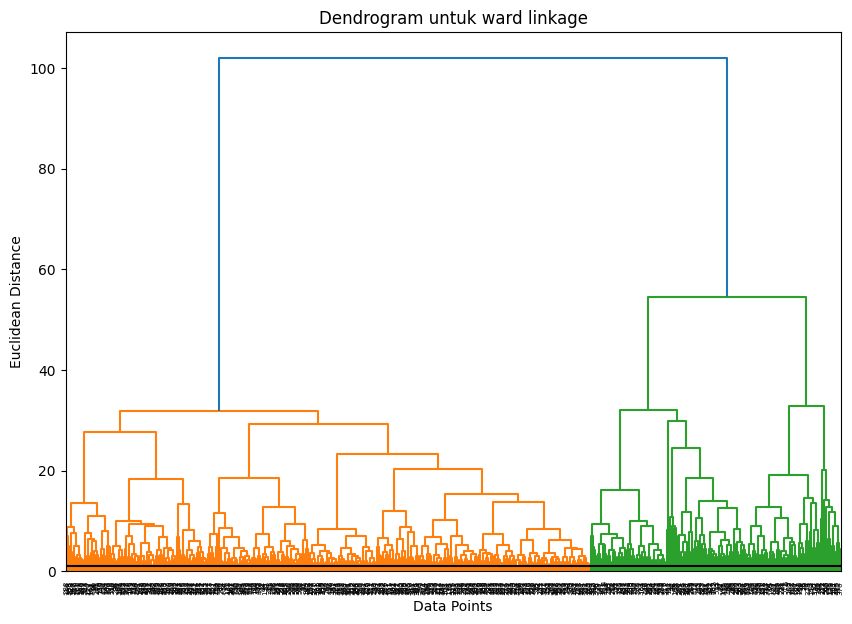

Nilai k optimal untuk metode Ward linkage adalah: 2 dengan Silhouette Score: 0.33938477753669855
Parameter terbaik: {'linkage': 'single', 'n_clusters': 2}


In [34]:
# Daftar metode linkage yang ingin diuji
linkage_methods = ['single', 'average', 'complete', 'ward']

# Inisialisasi list untuk menyimpan nilai Silhouette Score terbaik dan parameter terbaik
best_silhouette_score = -1
best_params = {}

for method in linkage_methods:
    # Menggambar dendrogram (jika perlu, bagian ini bisa diaktifkan)
    Z = linkage(df_scaled.drop('target', axis=1), method=method)
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f"Dendrogram untuk {method} linkage")
    plt.xlabel("Data Points")
    plt.ylabel("Euclidean Distance")
    max_d = 1  # Batas threshold
    plt.axhline(y=max_d, c='k')  # Menambahkan garis horizontal untuk batas threshold
    plt.show()
    
    # Inisialisasi list untuk menyimpan nilai Silhouette Score
    silhouette_scores = []
    k_range = range(2, 11)

    # Loop melalui setiap nilai k
    for k in k_range:
        # Melakukan klasterisasi dengan Agglomerative Clustering
        clusterer = AgglomerativeClustering(n_clusters=k, linkage=method)
        cluster_labels = clusterer.fit_predict(df_scaled.drop('target', axis=1))
        
        # Menghitung Silhouette Score
        avg_silhouette_score = silhouette_score(df_scaled.drop('target', axis=1), cluster_labels)
        
        # Menambahkan nilai Silhouette Score ke dalam list
        silhouette_scores.append(avg_silhouette_score)
    
    # Mencari nilai k dengan Silhouette Score tertinggi
    optimal_k = k_range[np.argmax(silhouette_scores)]
    print(f"Nilai k optimal untuk metode {method.capitalize()} linkage adalah: {optimal_k} dengan Silhouette Score: {max(silhouette_scores)}")
    
    # Memeriksa apakah nilai Silhouette Score terbaik
    if max(silhouette_scores) > best_silhouette_score:
        best_silhouette_score = max(silhouette_scores)
        best_params['linkage'] = method
        best_params['n_clusters'] = optimal_k

print("Parameter terbaik:", best_params)

In [35]:
# Fungsi Forward Selection yang dimodifikasi untuk menerima metode linkage sebagai parameter
def forward_selection_agglomerative(df, linkage_method):
    best_features = []
    remaining_features = list(df.columns[:-1])  # Asumsi kolom terakhir adalah target
    best_score = -1

    while remaining_features:
        scores = []
        for feature in remaining_features:
            tested_features = best_features + [feature]
            clusterer = AgglomerativeClustering(n_clusters=2, linkage=linkage_method)
            cluster_labels = clusterer.fit_predict(df[tested_features])
            score = silhouette_score(df[tested_features], cluster_labels)
            scores.append((score, feature))
        
        scores.sort(reverse=True)
        if scores[0][0] > best_score:
            best_score, best_feature = scores[0]
            best_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    return best_features, best_score

In [36]:
# Inisialisasi variabel untuk menyimpan hasil terbaik
best_overall_score = -1
best_method = None
best_features = None

# Daftar metode linkage yang ingin diuji
linkage_methods = ['single', 'average', 'complete', 'ward']
# Loop melalui setiap metode linkage
for method in linkage_methods:
    selected_features, score = forward_selection_agglomerative(df_scaled, method)
    if score > best_overall_score:
        best_overall_score = score
        best_method = method
        best_features = selected_features

print(f"Metode terbaik: {best_method}")
print(f"Fitur terbaik: {best_features}")
print(f"Silhouette Score terbaik: {best_overall_score}")

Metode terbaik: single
Fitur terbaik: ['area error']
Silhouette Score terbaik: 0.9304968225603524


In [37]:
def backward_selection_agglomerative(df, linkage_method):
    best_features = list(df.columns[:-1])  # Asumsi kolom terakhir adalah target
    best_score = -1

    while best_features:
        scores = []
        for feature in best_features:
            tested_features = list(best_features)
            tested_features.remove(feature)
            if not tested_features:  # Jika tidak ada fitur yang tersisa
                return best_features, best_score  # Kembalikan fitur terbaik yang telah ditemukan

            clusterer = AgglomerativeClustering(n_clusters=2, linkage=linkage_method)
            cluster_labels = clusterer.fit_predict(df[tested_features].values)
            score = silhouette_score(df[tested_features], cluster_labels)
            scores.append((score, feature))
        
        scores.sort(reverse=True)
        if scores and scores[0][0] > best_score:
            best_score, worst_feature = scores[0]
            best_features.remove(worst_feature)
        else:
            break
    return best_features, best_score

In [38]:
# Tentukan metode linkage yang akan diuji
linkage_methods = ["ward", "complete", "average", "single"]

best_overall_score = -1
best_method = None
best_features = None

# Loop melalui setiap metode linkage
for method in linkage_methods:
    selected_features, score = backward_selection_agglomerative(df_scaled, method)
    if score > best_overall_score:
        best_overall_score = score
        best_method = method
        best_features = selected_features

print(f"Metode terbaik: {best_method}")
print(f"Fitur terbaik: {best_features}")
print(f"Silhouette Score terbaik: {best_overall_score}")

Metode terbaik: complete
Fitur terbaik: ['area error']
Silhouette Score terbaik: 0.9304968225603524
